## Box-strip plot

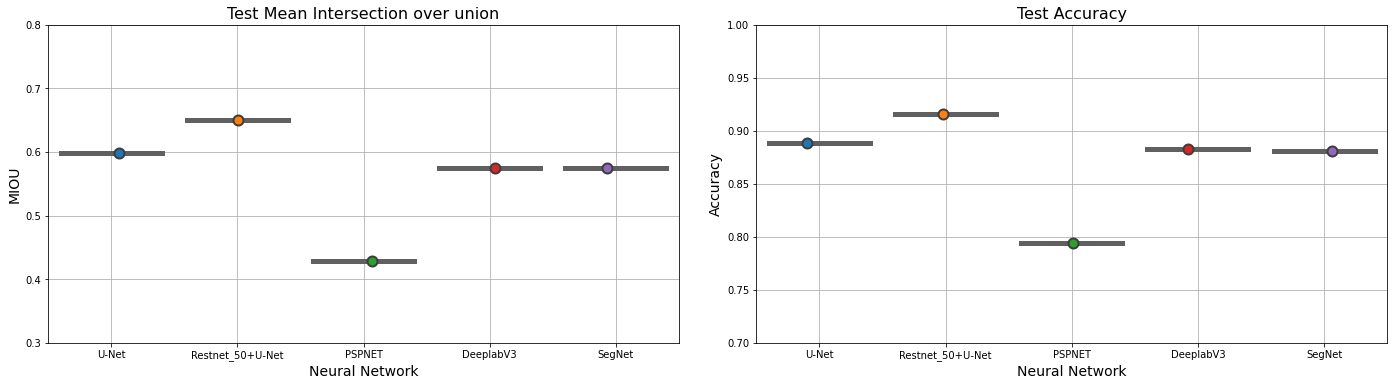

In [ ]:
#  Reference:
#  https://seaborn.pydata.org/generated/seaborn.stripplot.html
#  https://seaborn.pydata.org/examples/distplot_options.html

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# definig figure for subplot
figure, sub_axis = plt.subplots(1, 2,figsize=(20,6))

# DataFrame for plot Miou
entries1=[["U-Net",0.5979],["Restnet_50+U-Net",0.6496],["PSPNET",0.4284],["DeeplabV3",0.5752],["SegNet",0.5747]]
result_frame1 = pd.DataFrame(entries1, columns=["Neural Network", "MIOU"])

# DataFrame for plot Accuracy
entries2=[["U-Net",0.8888],["Restnet_50+U-Net",0.9160],["PSPNET",0.7941],["DeeplabV3",0.8832],["SegNet",0.8814]]
result_frame2 = pd.DataFrame(entries2, columns=["Neural Network", "Accuracy"])

# ploting Box-strip plot of MIOU
sns.boxplot(x='Neural Network', y='MIOU', data=result_frame1, linewidth=5, palette="coolwarm", ax=sub_axis[0])
sns.stripplot(x='Neural Network', y='MIOU', data=result_frame1, size=10, edgecolor="gray", linewidth=2, ax=sub_axis[0])
sub_axis[0].set_title("Test Mean Intersection over union",fontsize=16)
sub_axis[0].set(ylim=(0.3, 0.8))
sub_axis[0].set_xlabel("Neural Network", fontsize=14)
sub_axis[0].set_ylabel("MIOU", fontsize=14)
sub_axis[0].grid()

# ploting Box-strip plot of Accuracy
sns.boxplot(x='Neural Network', y='Accuracy', data=result_frame2, linewidth=5, palette="coolwarm", ax=sub_axis[1])
sns.stripplot(x='Neural Network', y='Accuracy', data=result_frame2, size=10, edgecolor="gray", linewidth=2, ax=sub_axis[1])
sub_axis[1].set_title("Test Accuracy",fontsize=16)
sub_axis[1].set(ylim=(0.7, 1))
sub_axis[1].set_xlabel("Neural Network", fontsize=14)
sub_axis[1].set_ylabel("Accuracy", fontsize=14)
sub_axis[1].grid()
plt.tight_layout(pad=3.0)
plt.show()

* The Best performing model is Restnet_50+U-Net with Test_Miou 0.6496 and Test_Accuracy 0.9160.

* The worst performing model is PspNet with Test_Miou 0.4284 and Test_Accuracy 0.7941.

* The Results of DeeplabV3 and SegNet are almost the same with decent Performance

## Pretty Table

In [ ]:
# pretty table
# https://ptable.readthedocs.io/en/latest/tutorial.html
print("\n\t\t\t  DEEP LEARNING MODELS ")
from prettytable import PrettyTable
T = PrettyTable()
T.field_names = ["Models","Train_MIOU", "Train_Accuracy","Test_MIOU", "Test_Accuracy"]
T.add_row(["U-Net ","0.6642", "0.9306","0.5979","0.8888"])
T.add_row([" ------------ ","------","------","------","------"])
T.add_row(["Restnet_50+U-Net ","0.7484", "0.9600","0.6496","0.9160"])
T.add_row([" ------------ ","------","------","------","------"])
T.add_row(["PSPNET ","0.4612", "0.8225","0.4284","0.7941"])
T.add_row([" ------------ ","------","------","------","------"])
T.add_row(["DeeplabV3 ","0.6598", "0.9279","0.5752","0.8832"])
T.add_row([" ------------ ","------","------","------","------"])
T.add_row(["SegNet ","0.6258", "0.9154","0.5747","0.8814"])
print(T)


			  DEEP LEARNING MODELS 
+-------------------+------------+----------------+-----------+---------------+
|       Models      | Train_MIOU | Train_Accuracy | Test_MIOU | Test_Accuracy |
+-------------------+------------+----------------+-----------+---------------+
|       U-Net       |   0.6642   |     0.9306     |   0.5979  |     0.8888    |
|    ------------   |   ------   |     ------     |   ------  |     ------    |
| Restnet_50+U-Net  |   0.7484   |     0.9600     |   0.6496  |     0.9160    |
|    ------------   |   ------   |     ------     |   ------  |     ------    |
|      PSPNET       |   0.4612   |     0.8225     |   0.4284  |     0.7941    |
|    ------------   |   ------   |     ------     |   ------  |     ------    |
|     DeeplabV3     |   0.6598   |     0.9279     |   0.5752  |     0.8832    |
|    ------------   |   ------   |     ------     |   ------  |     ------    |
|      SegNet       |   0.6258   |     0.9154     |   0.5747  |     0.8814    |
+-----------

## Steps Followed to solve this problem

 **1. Problem Definition:** This includes clearly understanding the problem being solved
  *  Indian Driving Dataset is a novel dataset for road scene understanding in unstructured environments with real-world driving behaviors that can be used to design an AI System for Autonomous Navigation without considering some assumptions such has well-delineated infrastructure such as lanes, a few well-defined categories for traffic participants, low variation in the object or background appearance and strict adherence to traffic rules.
  * The Main Goal is to Build an Efficient Deep learning Algorithm to perform Image segmentation for the data. Image segmentation involves assigning a label to every pixel in an image where the result of image segmentation is a set of segments that collectively cover the entire image and each of the pixels in a region are similar with respect to some characteristic such as color, intensity, or texture and Adjacent regions are significantly different with respect to the same characteristic.

 **2. Gathering Data:** The quality and quantity of data that you gather will determine how good your predictive model can be.
  * Several Datasets for Autonomous navigation have become available in recent years, they have tended to focus on **structured driving environments.** This usually corresponds to well-delineated infrastructures such as lanes, a small number of well-defined categories for traffic participants, and strong adherence to traffic rules.
  * The Dataset **India Driving Dataset** is collected here http://idd.insaan.iiit.ac.in from **AutoNUE Challenge 2019** on Image segmentation
  * The Dataset consists of images obtained from a front-facing camera attached to a car. The car was driven around Hyderabad, Bangalore cities and their outskirts. The images are mostly of 1080p resolution, but there are also some images with 720p and other resolutions.

**3. Data Analysis and Preprocessing:** This includes gaining insights from data to solve a problem and cleaning unwanted data
* The Dataset consists of **20k images** with a total size of **30 GB** which are finely annotated with **34 classes** collected from **182 drive sequences** on Indian roads. The data consists of road images from Bangalore and Hyderabad cities in India and their outskirts. The images have a mix of urban and rural areas, highway, single lane, and double lane roads with a variety of traffic.
* Data consists of a four-level label hierarchy where the highest hierarchy of label consists of **7 class** labels as Drivable, NonDrivable, Living Things, Vehicles, Road Side Objects, Far Objects, Sky.
* The Image and Label mask both have a resolution of 1920 x 1080 (width x height) and the Total number of data samples are considered to be distributed into Train, Validation, Test as **14027, 2036, 4038** respectively.
* This step Contain Image Data Analysis, Label Data Analysis, Comparision with Cityscapes Dataset and Analysing Data Statistics.
* Preprocessing Include Simplifying the File Structure of Dataset and making it simple for I/O operations.

 **4. Data preparation:** Discovering the format of data that the machine learning model can understand.
   * Image and Label Data Preparation Includes:
        * **Reading all images** and Labels one after another from Directory.   
        * **Resizing Images and Labels** to some height and width   
        * **Normalizing the pixel values** in an image by dividing by 255
        * **Performing one hot encoding** on mask resulting in a 3D matrix   
        * **Saving Prepared Data** of Image and Label in sparse representation for future Usage 
   * Shuffling prepared Data Samples and performing Train Test split on Data
   * Implementing Data generator to generate prepared Data Samples during Training.


 **6. Choosing a Model and Methods:** There are many Deep learning  Architecture that researchers have created over the years but this case study  includes the implementation of only a bunch of  algorithms 
 * Used **Deep Learning Architecture** below :
      *  U-Net
      *  PSPNET    
      *  DeepLabV3   
      *  Segnet    

 **6. Training:** The is considered the bulk of machine learning  which refers to Building a Learning model
 * Train Test split consists of **60-15-25** Split for Training, Validation, and  Testing respectively for Training Deep learning model.
 * Training can be done in **two ways** either by generating samples by reading and preprocessing data for each batch or by just start training with already saved preprocessed data of Dataset
 * The **Image resolution** is reduced while training from 1920 x 1080 to 480 x 240 (width x height) because of the limited availability of hardware resources.

 **7. Evaluation:** This is where the model is evaluated and performance is measured.
  * The goal of Deep learning model is to reduce **Multi-class log loss**
  * Used **Mean Intersection over union** as main Mertic to measure the performance of Deep Learning Model
  * Used **Accuracy** and **Confusion Matrix** as metric of Reference

 **8. Improve Results(Parameter Tuning):**  This is where Hyperparameter tuning is done to gain the best model possible
  * Tried a bunch of **Hyper Parameter values** to increase  Miou more as possible.
  * Used **Learning_rate_reduction** and **ModelCheckpoint** method to save the best model during training.
  * **Early stopping** method is used to avoid overfitting and enhance results.

 **9. Present results:** The results of the model performance for this are Represented in the **Box-strip plot** and **pretty table** and above.

**10.Productionalization and Deployment:** This is where the Model is put into operation or made available to use for the world for real data to predicts output.

**Deployed Link:** https://app-just-wait-and-reload.herokuapp.com/

### **CONCLUSION:**
* Semantic segmentation has many applications in image processing and computer vision <br> and more accurate and faster methods have been emerging for image segmentation 
* All learning Models above tend to have some confusion between Driving and Non-driving label.
* The Altering of the Learning rate for some epochs improve Miou and Accuracy significantly.
* The Imbalanced Data_set can sometimes be a curse for performance improvement.
* Finally best performing model is Restnet_50+U-Net with highest MIOU value which out perform other model.
<br>Thanks to IIIT Hyderabad and Intel India team for the efforts that they have taken to capture the <br>data and for making it available to everyone for experimentation.